In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests

from PIL import Image
from io import BytesIO

**Load model**

In [2]:
# Download model here: https://drive.google.com/file/d/1yVvK-I3utZY-gMc0IS3P-9lELZC8V58v/view?usp=share_link
#  Load 142 classes model
model54 = tf.keras.models.load_model('/Users/nopparuj/food_for_thoughts/model/best_model_142class_20_x.hdf5')

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-18 00:23:36.277557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-18 00:23:36.278457: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**Food classes label**

In [3]:
food_list = ['Apple_Pie','Baby_Back_Ribs','Baklava','Beef_Carpaccio','Beef_Tartare','Beet_Salad','Beignets','Bibimbap','Boopadpongali','Bread_Pudding','Breakfast_Burrito', 
             'Bruschetta','Caesar_Salad','Cannoli','Caprese_Salad','Carrot_Cake','Ceviche','Cheese_Plate','Cheesecake','Chicken_Curry','Chicken_Quesadilla','Chicken_Wings', 
             'Chocolate_Cake','Chocolate_Mousse','Churros','Clam_Chowder','Club_Sandwich','Crab_Cakes','Creme_Brulee','Croque_Madame','Cup_Cakes','Curriedfishcake', 
             'Deviled_Eggs','Donuts','Dumplings','Edamame','Eggs_Benedict','Eggsstewed','Escargots','Falafel','Filet_Mignon','Fish_And_Chips','Foie_Gras','French_Fries', 
             'French_Onion_Soup','French_Toast','Fried_Calamari','Fried_Rice','Friedkale','Frozen_Yogurt','Gaengjued','Gaengkeawwan','Garlic_Bread','Gnocchi','Goongobwoonsen', 
             'Goongpao','Greek_Salad','Grilled_Cheese_Sandwich','Grilled_Salmon','Grilledqquid','Guacamole','Gyoza','Hamburger','Hot_And_Sour_Soup','Hot_Dog','Hoykraeng',
             'Hoylaiprikpao','Huevos_Rancheros','Hummus','Ice_Cream','Joke','Kaithoon','Kaomangai','Kaomoodang','Khanomjeennamyakati','Khaomokgai','Khaomootodgratiem', 
             'Khaoniewmamuang','Kkaoklukkaphi','Kormooyang','Kuakling','Kuayjab','Kuayteowreua','Larbmoo','Lasagna','Lobster_Bisque','Lobster_Roll_Sandwich','Macaroni_And_Cheese', 
             'Macarons','Massamangai','Miso_Soup','Moosatay','Mussels','Nachos','Namtokmoo','Omelette','Onion_Rings','Oysters','Pad_Thai','Padpakbung','Padpakruammit', 
             'Paella','Pancakes','Panna_Cotta','Peking_Duck','Phatkaphrao','Pho','Pizza','Pork_Chop','Porkstickynoodles','Poutine','Prime_Rib','Pulled_Pork_Sandwich', 
             'Ramen','Ravioli','Red_Velvet_Cake','Risotto','Roast_Duck','Roast_Fish','Samosa','Sashimi','Scallops','Seaweed_Salad','Shrimp_And_Grits','Somtam', 
             'Soninlaweggs','Spaghetti_Bolognese','Spaghetti_Carbonara','Spring_Rolls','Steak','Stewedporkleg','Strawberry_Shortcake','Sushi','Tacos','Takoyaki', 
             'Tiramisu','Tomkhagai','Tomyumgoong','Tuna_Tartare','Waffles','Yamwoonsen','Yentafo']

classes = list(food_list)
# print(classes[0])

**Get images and process**

In [4]:
'''If want image from internet'''
def internet_get(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    input = img
    # Resize img to proper for feed model.
    img = img.resize((299,299))
    # Convert img to numpy array,rescale it,expand dims and check vertically.
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x / 255.0 
    x = np.expand_dims(x,axis = 0)
    img_tensor = np.vstack([x])
    return input,img_tensor

'''If want image from local'''
def local_get(path):
    img = Image.open(path)
    input = img
    # Resize img to proper for feed model.
    img = img.resize((299,299))
    # Convert img to numpy array,rescale it,expand dims and check vertically.
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x / 255.0 
    x = np.expand_dims(x,axis = 0)
    img_tensor = np.vstack([x])
    return input, img_tensor

def predict_result(path):
    original_img, img_tensor = local_get(path)
    pred = model54.predict(img_tensor)
    classes = list(food_list)
    class_predicted = classes[np.argmax(pred)]
    percent = np.max(pred)

    return percent, class_predicted


**Plot testing images and prediction results**

1/1 [==============================] - 0s 42ms/step


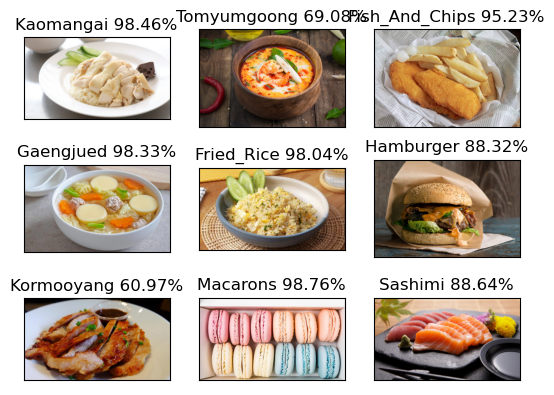

In [11]:
import glob

path = np.sort(glob.glob("/Users/nopparuj/food_for_thoughts/img/**"))

# print(path[0])

for i in range (9):
    plt.subplot(3,3,i+1)
    confidences, labels = predict_result(path[i])
    confidences = (confidences * 100)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Image.open(path[i]))
    plt.title(f"{labels} {confidences:.2f}%")
plt.show()

**Predict food image from internet**

1/1 [==============================] - 0s 198ms/step


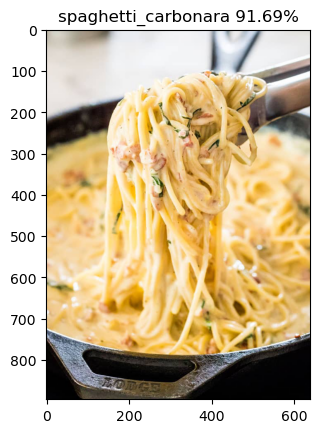

In [9]:
# Paste image url
src = 'https://www.jocooks.com/wp-content/uploads/2012/05/creamy-carbonara-1.jpg'
img_input, img_res = internet_get(src)
pred_res = model54.predict(img_res)
classes = list(food_list)
label = classes[np.argmax(pred_res)]
confident = np.max(pred_res) * 100

# Show internet image
plt.imshow(img_input)
plt.title(f"{label} {confident:.2f}%")
plt.show()
